# import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [3]:
path = r'\Users\grego\OneDrive\Desktop\Transfer Files\Career Foundry\Specialization\Task 2'

In [4]:
df_pleasant = pd.read_csv(os.path.join(path,'Project ClimateWins - Task 2','Original Data','pleasant_data.csv'))

In [5]:
df_weather = pd.read_csv(os.path.join(path,'Project ClimateWins - Task 2','Original Data','weather_data_original.csv'))

# work (1980s Date)

In [12]:
df_pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df_weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [16]:
weather_nodate = df_pleasant[df_pleasant['DATE'].astype(str).str.contains('198')]
weather_nodate

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
7305,19800101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7306,19800102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7307,19800103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7308,19800104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7309,19800105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,19891227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10954,19891228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10955,19891229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10956,19891230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
weather_nodate = weather_nodate.drop(['DATE'], axis=1)

In [20]:
weather_nodate

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
7305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7308,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10954,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df_weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [24]:
climate_nodate = df_weather[df_weather['DATE'].astype(str).str.contains('198')]
climate_nodate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
7305,19800101,1,6,2.1,0.83,1.0180,0.40,0.01,8,1.6,...,6,0.90,1.0130,0.17,0.05,0,0.0,4.4,2.1,6.0
7306,19800102,1,5,2.1,0.84,1.0180,0.34,0.09,7,0.9,...,7,0.89,1.0195,0.12,1.48,0,0.0,6.4,1.0,11.5
7307,19800103,1,8,2.1,0.80,1.0180,0.44,0.07,9,2.0,...,8,0.95,1.0058,0.13,0.60,0,0.0,9.2,6.2,12.2
7308,19800104,1,8,2.1,0.94,1.0180,0.18,0.43,9,0.0,...,5,0.80,1.0034,0.30,0.50,0,1.5,7.7,5.8,9.2
7309,19800105,1,8,2.1,0.90,1.0180,0.25,0.26,8,0.2,...,7,0.79,1.0134,0.22,0.03,0,0.1,7.6,6.1,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,19891227,12,6,2.1,0.87,1.0157,0.49,0.00,0,4.0,...,6,0.79,1.0105,0.22,0.12,0,0.1,6.0,1.8,10.1
10954,19891228,12,3,2.1,0.84,1.0196,0.54,0.00,0,6.4,...,8,0.84,1.0134,0.18,0.05,0,0.3,9.3,7.5,11.0
10955,19891229,12,4,2.1,0.85,1.0224,0.52,0.00,0,5.5,...,8,0.86,1.0110,0.12,1.10,0,0.0,10.1,8.8,11.4
10956,19891230,12,0,2.1,0.83,1.0233,0.57,0.00,0,6.6,...,8,0.84,1.0138,0.16,0.49,0,0.1,9.9,8.2,10.8


In [26]:
climate_nodate = climate_nodate.drop(['DATE','MONTH',
                                       'GDANSK_cloud_cover',
                                        'GDANSK_humidity',
                                        'GDANSK_precipitation',
                                        'GDANSK_snow_depth',
                                        'GDANSK_temp_mean',
                                        'GDANSK_temp_min',
                                        'GDANSK_temp_max',
                                        'ROMA_cloud_cover',
                                        'ROMA_wind_speed',
                                        'ROMA_humidity','ROMA_pressure',
                                        'ROMA_sunshine',
                                        'ROMA_temp_mean',
                                        'TOURS_wind_speed',
                                        'TOURS_humidity',
                                        'TOURS_pressure',
                                        'TOURS_global_radiation',
                                        'TOURS_precipitation',
                                        'TOURS_temp_mean',
                                        'TOURS_temp_min',
                                        'TOURS_temp_max'], axis=1)

In [28]:
climate_nodate = climate_nodate.loc[:, ~climate_nodate.columns.str.endswith('_snow_depth')]

In [30]:
position1 = climate_nodate.columns.get_loc('KASSEL_wind_speed')-1
climate_nodate.insert(position1,'KASSEL_cloud_cover',climate_nodate['LJUBLJANA_cloud_cover'])

In [32]:
position2 = climate_nodate.columns.get_loc('MUNCHENB_humidity')-1
position3 = climate_nodate.columns.get_loc('MUNCHENB_global_radiation')-1
climate_nodate.insert(position2,'MUNCHENB_wind_speed',climate_nodate['SONNBLICK_wind_speed'])
climate_nodate.insert(position3,'MUNCHENB_pressure',climate_nodate['SONNBLICK_pressure'])

In [34]:
position4 = climate_nodate.columns.get_loc('STOCKHOLM_pressure')-1
climate_nodate.insert(position4,'STOCKHOLM_humidity',climate_nodate['OSLO_humidity'])
position5 = climate_nodate.columns.get_loc('STOCKHOLM_humidity')-1
climate_nodate.insert(position5,'STOCKHOLM_wind_speed',climate_nodate['OSLO_wind_speed'])

In [36]:
climate_nodate = climate_nodate.loc[:, ~climate_nodate.columns.str.endswith('_wind_speed')]

In [38]:
climate_nodate

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
7305,6,0.83,1.0180,0.40,0.01,1.6,-0.8,-4.4,1.2,5,...,1.1,6,0.90,1.0130,0.17,0.05,0.0,4.4,2.1,6.0
7306,5,0.84,1.0180,0.34,0.09,0.9,-1.7,-4.0,0.6,7,...,-1.2,7,0.89,1.0195,0.12,1.48,0.0,6.4,1.0,11.5
7307,8,0.80,1.0180,0.44,0.07,2.0,-0.6,-3.7,1.3,8,...,-5.0,8,0.95,1.0058,0.13,0.60,0.0,9.2,6.2,12.2
7308,8,0.94,1.0180,0.18,0.43,0.0,-0.9,-2.2,2.2,5,...,-5.4,5,0.80,1.0034,0.30,0.50,1.5,7.7,5.8,9.2
7309,8,0.90,1.0180,0.25,0.26,0.2,3.0,0.5,5.3,3,...,0.2,7,0.79,1.0134,0.22,0.03,0.1,7.6,6.1,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,6,0.87,1.0157,0.49,0.00,4.0,-0.9,-2.4,1.8,7,...,4.0,6,0.79,1.0105,0.22,0.12,0.1,6.0,1.8,10.1
10954,3,0.84,1.0196,0.54,0.00,6.4,-1.1,-2.8,1.8,7,...,2.2,8,0.84,1.0134,0.18,0.05,0.3,9.3,7.5,11.0
10955,4,0.85,1.0224,0.52,0.00,5.5,-1.7,-4.5,1.3,8,...,0.4,8,0.86,1.0110,0.12,1.10,0.0,10.1,8.8,11.4
10956,0,0.83,1.0233,0.57,0.00,6.6,-2.1,-4.3,1.6,8,...,-0.5,8,0.84,1.0138,0.16,0.49,0.1,9.9,8.2,10.8


In [40]:
X = climate_nodate
y = weather_nodate

In [42]:
X.shape

(3653, 135)

In [44]:
y.shape

(3653, 15)

In [46]:
y= weather_nodate.max(axis=1)
print("Shape of y_1_combined:", y.shape)

Shape of y_1_combined: (3653,)


In [47]:
print("Unique values in y_1_combined:", y.unique())

Unique values in y_1_combined: [0 1]


In [50]:
y.shape

(3653,)

In [52]:
print(X.shape)
print(y.shape)

(3653, 135)
(3653,)


# create train and test

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [57]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2922, 135) (2922,)
(731, 135) (731,)


# focus on Budapest 1980s

In [59]:
df_bud = climate_nodate[climate_nodate.columns[climate_nodate.columns.astype(str).str.startswith('MADRID')]]
df_bud.head()

,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max
7305,4,0.63,1.0195,1.11,0.0,8.2,12.5,9.7,15.3
7306,3,0.56,1.0238,0.71,0.0,3.1,8.4,5.0,11.8
7307,2,0.75,1.0278,1.08,0.0,7.7,5.5,1.0,10.0
7308,0,0.78,1.0258,1.06,0.0,7.3,5.5,1.2,9.8
7309,5,0.78,1.0246,0.93,0.0,5.6,5.6,0.8,10.4


In [63]:
bud_pleasant = weather_nodate[weather_nodate.columns[weather_nodate.columns.astype(str).str.startswith('MADRID')]]
bud_pleasant.head()

,MADRID_pleasant_weather
7305,0
7306,0
7307,0
7308,0
7309,0


In [65]:
print(df_bud.shape)
print(bud_pleasant.shape)

(3653, 9)
(3653, 1)


In [67]:
y_2 = bud_pleasant.max(axis=1)

print("Shape of y_2_combined:", y_2.shape)

Shape of y_2_combined: (3653,)


In [69]:
y_2 = y_2.to_numpy().reshape(-1)

print(y_2.shape)

(3653,)


In [71]:
X_2 = df_bud.to_numpy()

print(X_2.shape)
print(y_2.shape)

(3653, 9)
(3653,)


In [73]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=127)

print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)


(2739, 9) (2739,)
(914, 9) (914,)


# grid search

In [76]:
clf_1a = RandomForestClassifier()

In [78]:
grid_space_1 = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7,9,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,3],
    'criterion': ['gini', 'entropy']}

In [80]:
start_1a = time.time()
grid_1a = GridSearchCV(clf_1a,param_grid=grid_space_1,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid_1a = grid_1a.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start_1a)/60))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Search took 3.6314224441846212 minutes


In [81]:
print('Best GRID search hyperparameters are: '+str(model_grid_1a.best_params_))
print('Best GRID search score is: '+str(model_grid_1a.best_score_))

Best GRID search hyperparameters are: {'criterion': 'gini', 'max_depth': None, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.9688569472963723


# random search

In [83]:
clf_1b = RandomForestClassifier()

In [84]:
rs_space_1 = {
    'max_depth':list(np.arange(10, 100, step=10)) + [None],
    'n_estimators':np.arange(10, 500, step=50),
    'max_features':randint(1,15),
    'criterion':['gini','entropy'],
    'min_samples_leaf':randint(1,4),
    'min_samples_split':np.arange(2, 10, step=2)}

In [85]:
start_1b = time.time()
rf_random_1b = RandomizedSearchCV(clf_1b, rs_space_1, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random_1b = rf_random_1b.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start_1b)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 2.210038153330485 minutes


In [86]:
print('Best RANDOM search hyperparameters are: '+str(model_random_1b.best_params_))
print('Best RANDOM search score is: '+str(model_random_1b.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 80, 'max_features': 14, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 460}
Best RANDOM search score is: 0.9661190965092402


In [87]:
clf_1c = RandomForestClassifier(
    n_estimators = 100, 
    max_depth=None, 
    max_features=15, 
    min_samples_leaf=2, 
    min_samples_split=2, 
    criterion = 'gini'
)

In [88]:
clf_1c.fit(X_train, y_train)

RandomForestClassifier(max_features=15, min_samples_leaf=2)

In [89]:
y_pred = clf_1c.predict(X_test)

print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9726402188782489


# BUDAPEST Specific (Grid Search)

In [91]:
clf_2a = RandomForestClassifier()

In [92]:
grid_space_2 = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7,9,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,3],
    'criterion': ['gini', 'entropy']}

In [93]:
start_2a = time.time()
grid_2a = GridSearchCV(clf_2a,param_grid=grid_space_2,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid_2a = grid_2a.fit(X_train_2, y_train_2)
print('Search took %s minutes' % ((time.time() - start_2a)/60))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Search took 1.8909546971321105 minutes


In [94]:
print('Best GRID search hyperparameters are: '+str(model_grid_2a.best_params_))
print('Best GRID search score is: '+str(model_grid_2a.best_score_))

Best GRID search hyperparameters are: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


# BUDAPEST Random Search 

In [96]:
clf_2b = RandomForestClassifier()

In [97]:
rs_space_2 = {
    'max_depth':list(np.arange(10, 100, step=10)) + [None],
    'n_estimators':np.arange(10, 500, step=50),
    'max_features':randint(1,15),
    'criterion':['gini','entropy'],
    'min_samples_leaf':randint(1,4),
    'min_samples_split':np.arange(2, 10, step=2)}

In [98]:
start_2b = time.time()
rf_random_2b = RandomizedSearchCV(clf_2b, rs_space_2, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random_2b = rf_random_2b.fit(X_train_2, y_train_2)
print('Search took %s minutes' % ((time.time() - start_2b)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 0.9851459900538126 minutes


In [99]:
print('Best RANDOM search hyperparameters are: '+str(model_random_2b.best_params_))
print('Best RANDOM search score is: '+str(model_random_2b.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 40, 'max_features': 14, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 60}
Best RANDOM search score is: 1.0


In [100]:
clf_2c = RandomForestClassifier(
    n_estimators=10, 
    max_depth=3, 
    max_features=7, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    criterion = 'gini')

In [101]:
clf_2c.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=3, max_features=7, n_estimators=10)

In [102]:
y_pred_2 = clf_2c.predict(X_test_2)

# Calculate the accuracy of the model
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  1.0


# Modeling Data

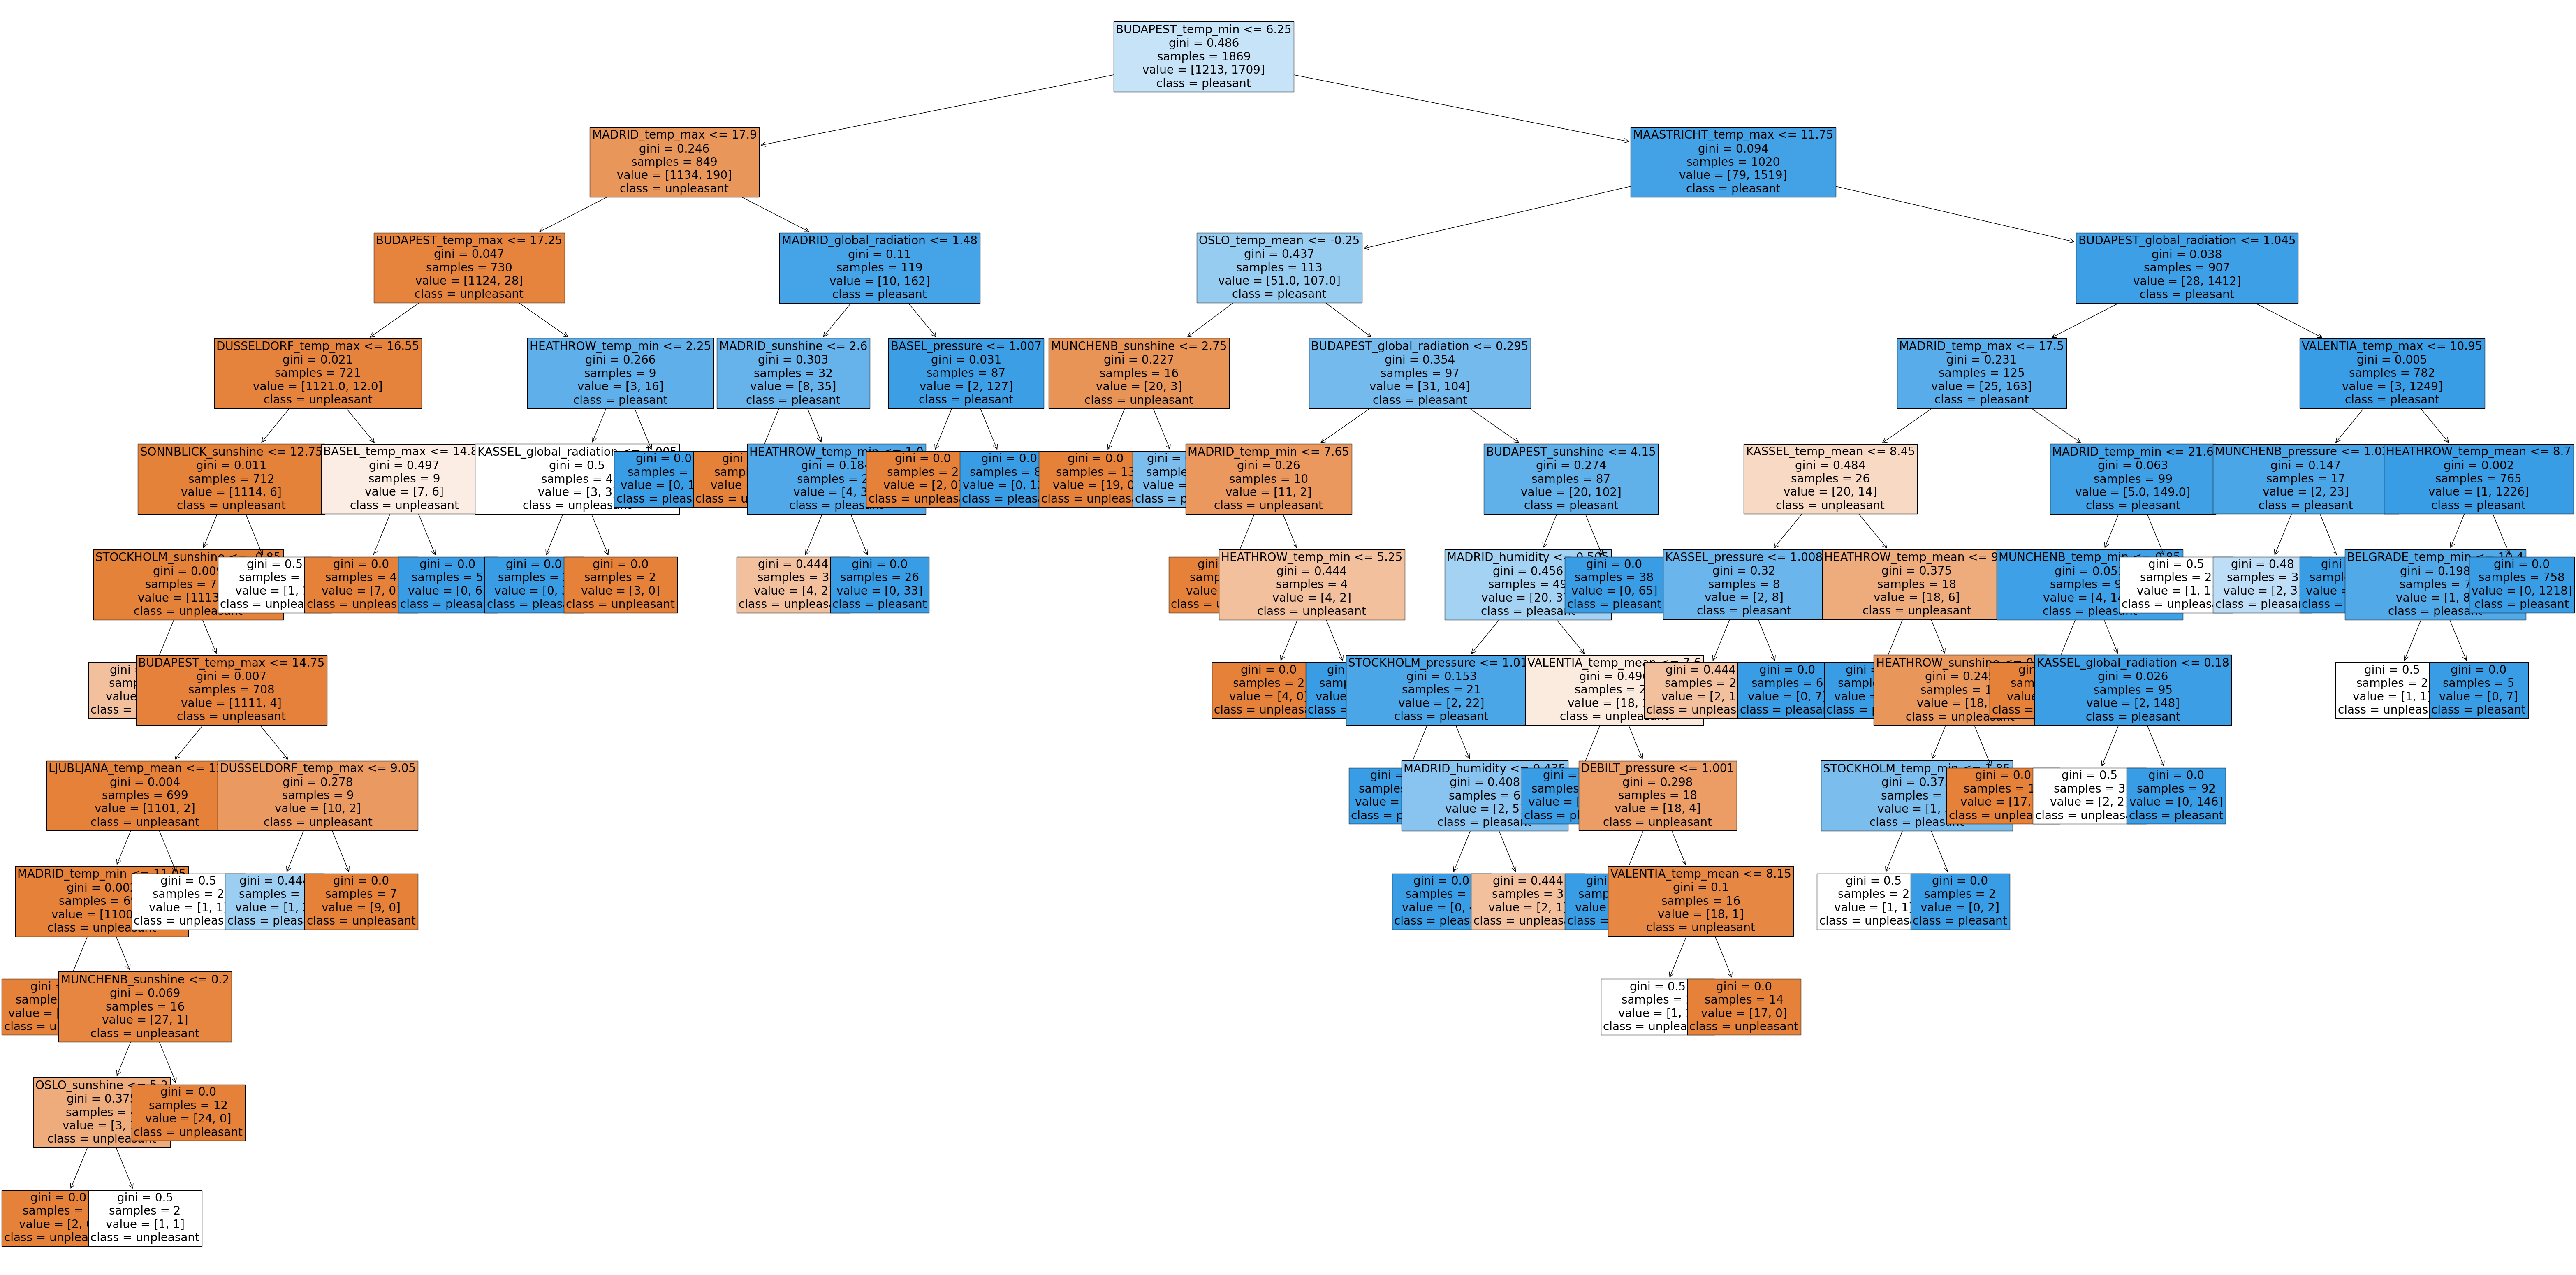

In [104]:
rf_1 = plt.figure(figsize=(80,40))
plot_tree(clf_1c.estimators_[5], fontsize = 20, feature_names=climate_nodate.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [105]:
rf_1.savefig(os.path.join(path, 'Project ClimateWins - Task 2','Visualizations','random_forest_1980s_optimized.png'))

# important features

In [107]:
feature_importances_1 = clf_1c.feature_importances_
print("Feature Importances:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances: [0.00029616 0.00093176 0.00086443 0.00113963 0.00071865 0.00070603
 0.06027339 0.00192138 0.01493842 0.00033812 0.00139543 0.00075799
 0.00385109 0.00125668 0.00297188 0.04353935 0.00329481 0.0522182
 0.00054224 0.00081543 0.00071218 0.0055654  0.00070696 0.0015253
 0.07247066 0.08702873 0.05353111 0.00017654 0.00059009 0.00086938
 0.00197041 0.00063644 0.00037323 0.00214604 0.00095993 0.02202883
 0.00038216 0.00049569 0.00091496 0.00173372 0.0005852  0.00052308
 0.00239314 0.0004902  0.03144135 0.00070815 0.00071755 0.00081321
 0.00142038 0.00039213 0.00059972 0.00137217 0.00120748 0.00042169
 0.0035909  0.00032937 0.00079695 0.00214236 0.00057245 0.00060847
 0.00853761 0.00101298 0.04933157 0.0003271  0.00175632 0.00104629
 0.00276128 0.00038417 0.00109315 0.06413653 0.00790984 0.06916429
 0.00032413 0.00047507 0.00113444 0.00103174 0.00099238 0.00082447
 0.00119562 0.00137115 0.00224617 0.00141947 0.00269114 0.00224577
 0.00498352 0.00199314 0.00336745 0.0388157

In [108]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_1 = feature_importances_1.reshape(-1, 15, 9)

print("Reshaped Importances Shape:", reshaped_importances_1.shape)

Reshaped Importances Shape: (1, 15, 9)


In [109]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_1 = np.sum(reshaped_importances_1[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_1.shape)
print("Collapsed Importances:", collapsed_importances_1)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.08178985 0.10962356 0.22289801 0.02975089 0.03895949 0.00765247
 0.06692265 0.14857897 0.00959519 0.18260215 0.02832565 0.03656057
 0.00741023 0.02028942 0.00904091]


In [110]:
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [111]:
collapsed_importances_df_1 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_1
})

In [112]:
collapsed_importances_df_1 = collapsed_importances_df_1.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_1)

Collapsed Feature Importances:
   Weather Station  Importance
2         BUDAPEST    0.222898
9           MADRID    0.182602
7        LJUBLJANA    0.148579
1         BELGRADE    0.109624
0            BASEL    0.081790
6           KASSEL    0.066923
4       DUSSELDORF    0.038959
11            OSLO    0.036561
3           DEBILT    0.029751
10        MUNCHENB    0.028326
13       STOCKHOLM    0.020289
8       MAASTRICHT    0.009595
14        VALENTIA    0.009041
5         HEATHROW    0.007652
12       SONNBLICK    0.007410


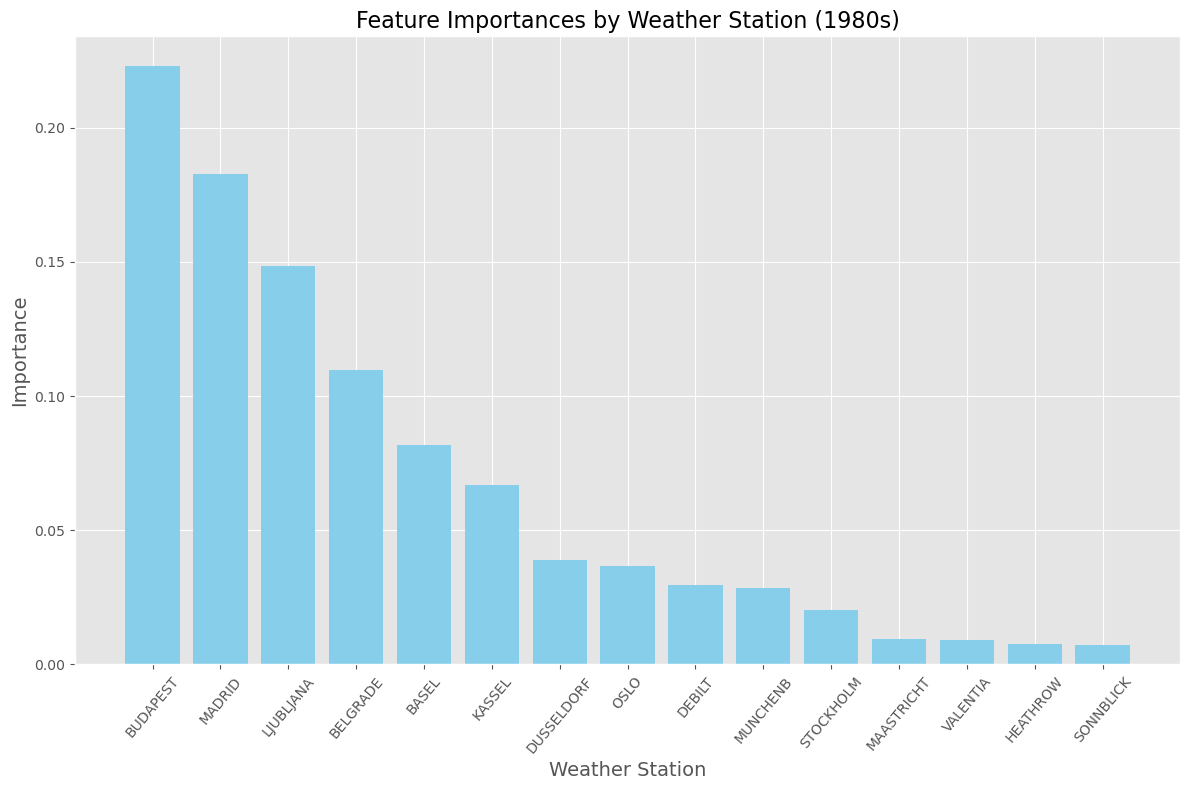

In [113]:
plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_1['Weather Station'], collapsed_importances_df_1['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (1980s)', fontsize=16)
plt.tight_layout()
plt.show()

# Budapest Forest and Features

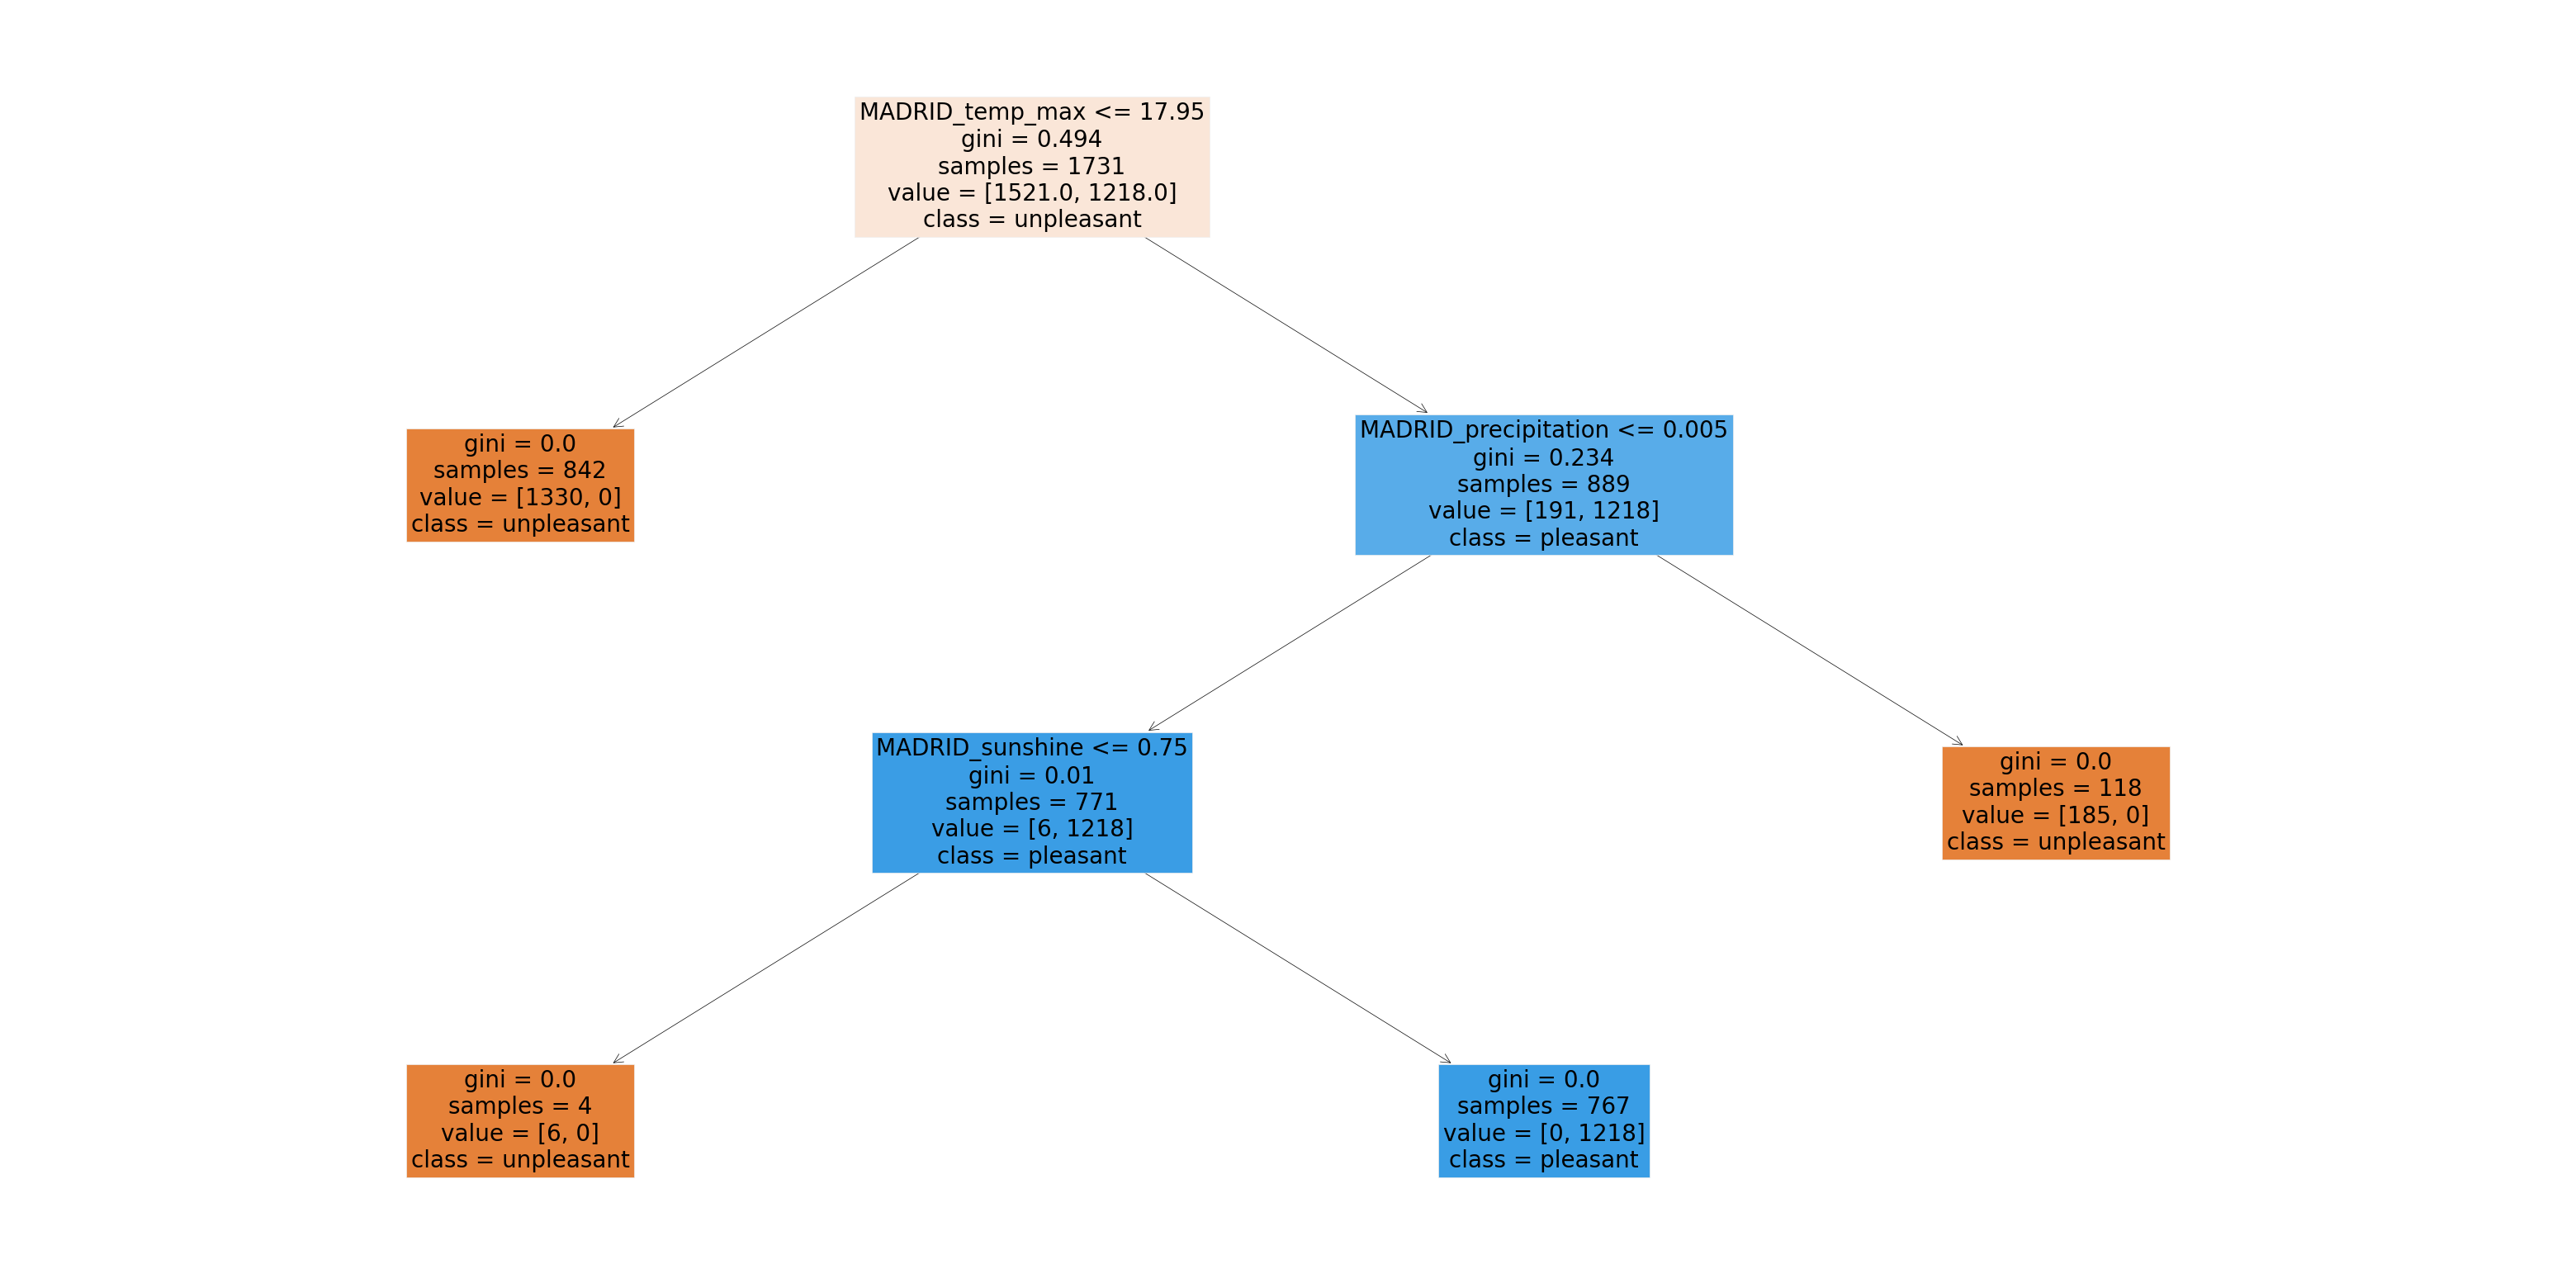

In [115]:
rf_2 = plt.figure(figsize=(40,20))
plot_tree(clf_2c.estimators_[5], fontsize = 20, feature_names=df_bud.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [116]:
rf_2.savefig(os.path.join(path, 'Project ClimateWins - Task 2','Visualizations','random_forest_budapest_optimized.png'))

In [117]:
feature_importances_2 = clf_2c.feature_importances_
print("Feature Importances:", feature_importances_2)
print(feature_importances_2.shape)

Feature Importances: [8.38476610e-03 2.77727872e-03 1.07519060e-03 5.90760586e-06
 2.22601268e-01 3.81093488e-03 8.66328113e-03 9.43729823e-02
 6.58308390e-01]
(9,)


In [118]:
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [119]:
importances_df_2 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_2
})

In [120]:
importances_df_2 = importances_df_2.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_2)

Feature Importance:
        Measurement  Importance
8          temp_max    0.658308
4     precipitation    0.222601
7          temp_min    0.094373
6         temp_mean    0.008663
0       cloud_cover    0.008385
5          sunshine    0.003811
1          humidity    0.002777
2          pressure    0.001075
3  global_radiation    0.000006


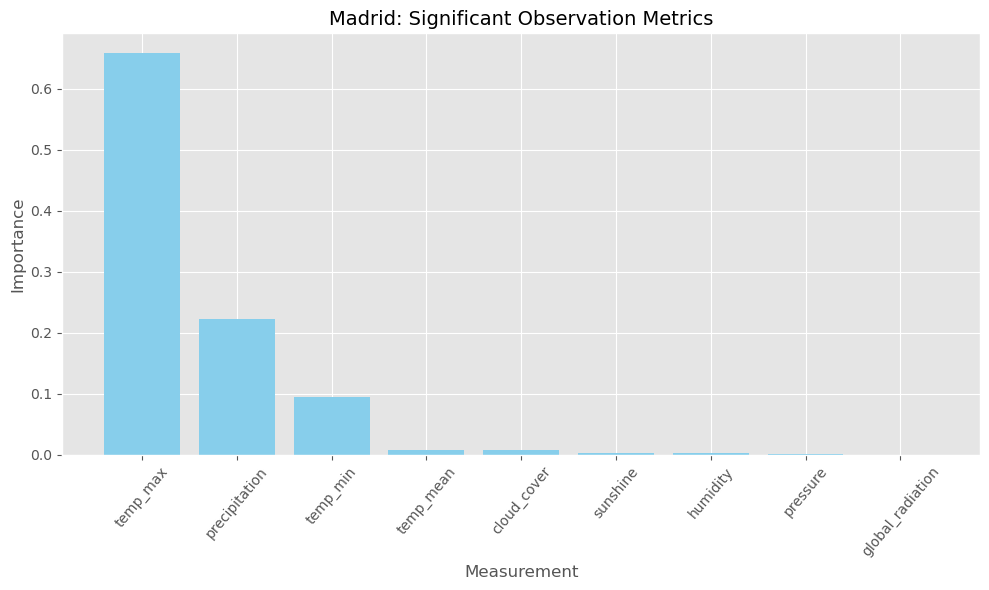

In [153]:
plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_2['Measurement'], importances_df_2['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()